In [ ]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_Acc.npy")[:, :, 2]
    return x

In [ ]:
Hips = load_numpy("Hips")

np.where(np.isnan(Hips))

In [ ]:
Bag = load_numpy("Bag")
HIps = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

In [ ]:
test = np.load("../Data/センサ別npyファイル/test/test_Glo_Acc.npy")[:, :, 2]

In [ ]:
def get_skew(x):
    x_kurtosis = stats.kurtosis(x, axis=1)
    x_skew = stats.skew(x, axis=1)
    result = np.concatenate([x_kurtosis.reshape([-1, 1]), x_skew.reshape([-1, 1])], axis=1)
    del x_kurtosis, x_skew
    return result

In [ ]:
test_skew = get_skew(test)
test.shape

In [ ]:
np.save("../Output/test/test_glo_accel_z_skew_kurtosis", test)

In [ ]:
Bag_skew = get_skew(Bag)
Hips_skew = get_skew(HIps)
Torso_skew = get_skew(Torso)
Hand_skew = get_skew(Hand)

Bag_skew.shape

In [ ]:
np.save("train_Bag_glo_accel_z_skew_kurtosis", Bag_skew)
np.save("train_Hips_glo_accel_z_skew_kurtosis", Hips_skew)
np.save("train_Torso_glo_accel_z_skew_kurtosis", Torso_skew)
np.save("train_Hand_glo_accel_z_skew_kurtosis", Hand_skew)

In [ ]:
def fft(x):
    for i in range(x.shape[0]):
        x[i] = x[i] - np.mean(x[i])
    x = np.abs(np.fft.fft(x, axis=1))
    max_amplitude = np.amax(x, axis=1)
    max_index = np.argmax(x, axis=1)
    max_frequency = max_index * 0.2
    result = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
    return result

In [ ]:
test_FFT = fft(test)
test_FFT.shape

In [ ]:
np.save("../Output/test/test_glo_accel_z_amplitude_frequency", test_FFT)

In [ ]:
Bag_FFT = fft(Bag)

Bag_FFT

In [ ]:
Bag_FFT[:, 1] != 0

In [ ]:
Bag_FFT.shape

In [ ]:
plt.plot(Bag_FFT[0:250, 1])
plt.xlim(0, 250)
# plt.ylim(0, 100)

In [ ]:
Hips_FFT = fft(HIps)
Torso_FFT = fft(Torso)
Hand_FFT = fft(Hand)

Hand_FFT.shape

In [ ]:
np.save("train_Bag_glo_accel_z_amplitude_frequency", Bag_FFT)
np.save("train_Hips_glo_accel_z_amplitude_frequency", Hips_FFT)
np.save("train_Torso_glo_accel_z_amplitude_frequency", Torso_FFT)
np.save("train_Hand_glo_accel_z_amplitude_frequency", Hand_FFT)

In [ ]:
%reset

# ここからvalidationデータの前処理

In [1]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
Bag = pickle.load(open("validation_Bag.binaryfile", 'rb'))
Hips = pickle.load(open("validation_Hips.binaryfile", 'rb'))
Torso = pickle.load(open("validation_Torso.binaryfile", 'rb'))
Hand = pickle.load(open("validation_Hand.binaryfile", 'rb'))

Bag.shape

In [ ]:
def get_skew(x):
    x_kurtosis = stats.kurtosis(x[:, :, 6], axis=1)
    x_skew = stats.skew(x[:, :, 6], axis=1)
    result = np.concatenate([x_kurtosis.reshape([-1, 1]), x_skew.reshape([-1, 1])], axis=1)
    del x_kurtosis, x_skew
    return result

In [ ]:
Bag_skew = get_skew(Bag)
Hips_skew = get_skew(Hips)
Torso_skew = get_skew(Torso)
Hand_skew = get_skew(Hand)

Bag_skew.shape

In [ ]:
np.save("validation_Bag_glo_accel_z_skew_kurtosis", Bag_skew)
np.save("validation_Hips_glo_accel_z_skew_kurtosis", Hips_skew)
np.save("validation_Torso_glo_accel_z_skew_kurtosis", Torso_skew)
np.save("validation_Hand_glo_accel_z_skew_kurtosis", Hand_skew)

In [ ]:
def fft(x):
    for i in range(x.shape[0]):
        x[i, :, 6] = x[i, :, 6] - np.mean(x[i, :, 6], axis=0)
    x[:, :, 6] = np.abs(np.fft.fft(x[:, :, 6], axis=1))
    max_amplitude = np.amax(x[:, :, 6], axis=1)
    max_index = np.argmax(x[:, :, 6], axis=1)
    max_frequency = max_index * 0.2
    result = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
    return result

In [ ]:
Bag_FFT = fft(Bag)
Hips_FFT = fft(Hips)
Torso_FFT = fft(Torso)
Hand_FFT = fft(Hand)

Hand_FFT.shape

In [ ]:
np.save("validation_Bag_glo_accel_z_amplitude_frequency", Bag_FFT)
np.save("validation_Hips_glo_accel_z_amplitude_frequency", Hips_FFT)
np.save("validation_Torso_glo_accel_z_amplitude_frequency", Torso_FFT)
np.save("validation_Hand_glo_accel_z_amplitude_frequency", Hand_FFT)

In [ ]:
def val_Preprocess(x):
    x_xy = np.sqrt(np.square(x[:, :, 4].copy()) + np.square(x[:, :, 5].copy()))
    x_xy_mean = np.mean(x_xy.copy(), axis=1)
    x_xy_var = np.var(x_xy.copy(), axis=1)
    x_z_mean = np.mean(x[:, :, 6].copy(), axis=1)
    x_z_var = np.var(x[:, :, 6].copy(), axis=1)
    x_pressure_change = x[:, -1, -1] - x[:, 0, -1]
    result = np.vstack([x_xy_mean, x_xy_var, x_z_mean, x_z_var, x_pressure_change]).T
    return result

In [ ]:
test = pickle.load(open("../Output/test/test.binaryfile", 'rb'))
test.shape

In [ ]:
test_preprocess = val_Preprocess(test)
test_preprocess.shape

In [ ]:
np.save("../Output/test/test_glo_accel_xy_mean", test_preprocess[:, 0])
np.save("../Output/test/test_glo_accel_xy_var", test_preprocess[:, 1])
np.save("../Output/test/test_glo_accel_z_mean", test_preprocess[:, 2])
np.save("../Output/test/test_glo_accel_z_var", test_preprocess[:, 3])
np.save("../Output/test/test_pressure_change", test_preprocess[:, 4])

In [ ]:
Bag_preprocess = val_Preprocess(Bag)
Hips_preprocess = val_Preprocess(Hips)
Torso_preprocess = val_Preprocess(Torso)
Hand_preprocess = val_Preprocess(Hand)

Bag_preprocess.shape

In [ ]:
def save_npy(x, hold_position):
    np.save("validation_" + hold_position + "_glo_accel_xy_mean", x[:, 0])
    np.save("validation_" + hold_position + "_glo_accel_xy_var", x[:, 1])
    np.save("validation_" + hold_position + "_glo_accel_z_mean", x[:, 2])
    np.save("validation_" + hold_position + "_glo_accel_z_var", x[:, 3])
    np.save("validation_" + hold_position + "pressure_change", x[:, 4])

In [ ]:
save_npy(Bag_preprocess, "Bag")
save_npy(Hips_preprocess, "Hips")
save_npy(Torso_preprocess, "Torso")
save_npy(Hand_preprocess, "Hand")

## trainデータのGlo_LAccの変形

In [2]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_LAcc.npy")
    return x

In [3]:
Bag = load_numpy("Bag")
HIps = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

(195491, 500, 3)

In [4]:
def lacc_convert(x):
    x_xy = np.sqrt(np.square(x[:, :, 0]) + np.square(x[:, :, 1]))
    x_xy_mean = np.mean(x_xy, axis=1)
    x_xy_var = np.var(x_xy, axis=1)
    x_z_mean = np.mean(x[:, :, 2], axis=1)
    x_z_abs_mean = np.mean(np.abs(x[:, :, 2]), axis=1)
    x_z_var = np.var(x[:, :, 2], axis=1)
    x_z_kurtosis = stats.kurtosis(x[:, :, 2], axis=1)
    x_z_skew = stats.skew(x[:, :, 2], axis=1)
    result = np.concatenate([x_xy_mean.reshape(-1, 1), x_xy_var.reshape([-1, 1]), x_z_mean.reshape([-1, 1]), x_z_abs_mean.reshape([-1, 1]), x_z_var.reshape([-1, 1]), x_z_skew.reshape([-1, 1]), x_z_kurtosis.reshape([-1, 1])], axis=1)
    del x_xy, x_xy_mean, x_xy_var, x_z_mean, x_z_abs_mean, x_z_var
    return result

In [5]:
Bag_lacc = lacc_convert(Bag)
Hips_lacc = lacc_convert(HIps)
Torso_lacc = lacc_convert(Torso)
Hand_lacc = lacc_convert(Hand)

Hand_lacc.shape

(195491, 7)

In [6]:
def save_npy(x, hold_position):
    np.save("train_" + hold_position + "_laccel_xy_mean", x[:, 0])
    np.save("train_" + hold_position + "_laccel_xy_var", x[:, 1])
    np.save("train_" + hold_position + "_laccel_z_mean", x[:, 2])
    np.save("train_" + hold_position + "_laccel_z_abs_mean", x[:, 3])
    np.save("train_" + hold_position + "_laccel_z_var", x[:, 4])
    np.save("train_" + hold_position + "_laccel_z_skew", x[:, 5])
    np.save("train_" + hold_position + "_laccel_z_kurtosis", x[:, 6])

In [7]:
save_npy(Bag_lacc, "Bag")
save_npy(Hips_lacc, "Hips")
save_npy(Torso_lacc, "Torso")
save_npy(Hand_lacc, "Hand")

In [8]:
def fft(x):
    for i in range(x.shape[0]):
        x[i] = x[i] - np.mean(x[i])
    x = np.abs(np.fft.fft(x, axis=1))
    max_amplitude = np.amax(x, axis=1)
    max_index = np.argmax(x, axis=1)
    max_frequency = max_index * 0.2
    result = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
    return result

In [9]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(HIps[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

(195491, 2)

In [10]:
np.save("train_Bag_glo_z_amplitude_frequency", Bag_FFT)
np.save("train_Hips_glo_z_amplitude_frequency", Hips_FFT)
np.save("train_Torso_glo_z_amplitude_frequency", Torso_FFT)
np.save("train_Hand_glo_z_amplitude_frequency", Hand_FFT)

# Validationもセンサ別にnpyにしておくよ

In [11]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [14]:
def load_npy(hold_position):
    x = pickle.load(open("../Output/validation/validation_" + hold_position + "/validation_" + hold_position + ".binaryfile", 'rb'))
    return x

In [15]:
Bag = load_npy("Bag")
Hips = load_npy("Hips")
Torso = load_npy("Torso")
Hand = load_npy("Hand")


Hand.shape

(28685, 500, 24)

In [ ]:
import os
def save_npy(x, hold_position):
    path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/"
    if not os.path.exists(path):
        os.makedirs(path)
    np.save(path + "validation_" + hold_position + "_Label", x[:, :, 0])
    np.save(path + "validation_" + hold_position + "_Acc", x[:, :, 1:4])
    np.save(path + "validation_" + hold_position + "_Glo_Acc", x[:, :, 4:7])
    np.save(path + "validation_" + hold_position + "_Gra", x[:, :, 7:10])
    np.save(path + "validation_" + hold_position + "_Gyr", x[:, :, 10:13])
    np.save(path + "validation_" + hold_position + "_LAcc", x[:, :, 13:16])
    np.save(path + "validation_" + hold_position + "_Mag", x[:, :, 16:19])
    np.save(path + "validation_" + hold_position + "_Ori", x[:, :, 19:23])
    np.save(path + "validation_" + hold_position + "_Pressure", x[:, :, 23])

In [ ]:
save_npy(Bag, "Bag")
save_npy(Hips, "Hips")
save_npy(Torso, "Torso")
save_npy(Hand, "Hand")

# 続けてtestデータも

In [ ]:
test = pickle.load(open("test.binaryfile", 'rb'))
test.shape

In [ ]:
import os
def save_npy(x):
    path = "../Data/センサ別npyファイル/test/"
    if not os.path.exists(path):
        os.makedirs(path)
    np.save(path + "test_Acc", x[:, :, 0:3])
    np.save(path + "test_Glo_Acc", x[:, :, 3:6])
    np.save(path + "test_Gra", x[:, :, 6:9])
    np.save(path + "test_Gyr", x[:, :, 9:12])
    np.save(path + "test_LAcc", x[:, :, 12:15])
    np.save(path + "test_Mag", x[:, :, 15:18])
    np.save(path + "test_Ori", x[:, :, 18:22])
    np.save(path + "test_Pressure", x[:, :, 22])

In [ ]:
save_npy(test)

# Validationデータの世界座標系線形加速度の変換

In [1]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Lacc.npy")
    return x

In [3]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Hand.shape

(28685, 500, 3)

In [2]:
def load_numpy():
    x = np.load("../Data/センサ別npyファイル/test/test_Lacc.npy")
    return x

In [3]:
test = load_numpy()
test.shape

(57573, 500, 3)

In [14]:
def lacc_convert(x):
    x_xy = np.sqrt(np.square(x[:, :, 0]) + np.square(x[:, :, 1]))
    x_xy_mean = np.mean(x_xy, axis=1)
    x_xy_var = np.var(x_xy, axis=1)
    x_z_mean = np.mean(x[:, :, 2], axis=1)
    x_z_abs_mean = np.mean(np.abs(x[:, :, 2]), axis=1)
    x_z_var = np.var(x[:, :, 2], axis=1)
    x_z_kurtosis = stats.kurtosis(x[:, :, 2], axis=1)
    x_z_skew = stats.skew(x[:, :, 2], axis=1)
    result = np.concatenate([x_xy_mean.reshape(-1, 1), x_xy_var.reshape([-1, 1]), x_z_mean.reshape([-1, 1]), x_z_abs_mean.reshape([-1, 1]), x_z_var.reshape([-1, 1]), x_z_skew.reshape([-1, 1]), x_z_kurtosis.reshape([-1, 1])], axis=1)
    del x_xy, x_xy_mean, x_xy_var, x_z_mean, x_z_abs_mean, x_z_var
    return result

In [15]:
test_lacc = lacc_convert(test)
test_lacc.shape

(57573, 7)

In [16]:
def save_npy(x):
    np.save("../Output/test/test_laccel_xy_mean", x[:, 0])
    np.save("../Output/test/test_laccel_xy_var", x[:, 1])
    np.save("../Output/test/test_laccel_z_mean", x[:, 2])
    np.save("../Output/test/test_laccel_z_abs_mean", x[:, 3])
    np.save("../Output/test/test_laccel_z_var", x[:, 4])
    np.save("../Output/test/test_laccel_z_skew", x[:, 5])
    np.save("../Output/test/test_laccel_z_kurtosis", x[:, 6])
save_npy(test_lacc)

In [5]:
Bag_lacc = lacc_convert(Bag)
Hips_lacc = lacc_convert(Hips)
Torso_lacc = lacc_convert(Torso)
Hand_lacc = lacc_convert(Hand)

Hand_lacc.shape

(28685, 7)

In [6]:
def save_npy(x, hold_position):
    np.save("validation_" + hold_position + "_laccel_xy_mean", x[:, 0])
    np.save("validation_" + hold_position + "_laccel_xy_var", x[:, 1])
    np.save("validation_" + hold_position + "_laccel_z_mean", x[:, 2])
    np.save("validation_" + hold_position + "_laccel_z_abs_mean", x[:, 3])
    np.save("validation_" + hold_position + "_laccel_z_var", x[:, 4])
    np.save("validation_" + hold_position + "_laccel_z_skew", x[:, 5])
    np.save("validation_" + hold_position + "_laccel_z_kurtosis", x[:, 6])

In [7]:
save_npy(Bag_lacc, "Bag")
save_npy(Hips_lacc, "Hips")
save_npy(Torso_lacc, "Torso")
save_npy(Hand_lacc, "Hand")

In [17]:
def fft(x):
    for i in range(x.shape[0]):
        x[i] = x[i] - np.mean(x[i])
    x = np.abs(np.fft.fft(x, axis=1))
    max_amplitude = np.amax(x, axis=1)
    max_index = np.argmax(x, axis=1)
    max_frequency = max_index * 0.2
    result = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
    return result

In [18]:
test_FFT = fft(test[:, :, 2])
test.shape

(57573, 500, 3)

In [19]:
np.save("../Output/test/test_laccel_z_amplitude_frequency", test_FFT)

In [9]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

(28685, 2)

In [10]:
np.save("validation_Bag_laccel_z_amplitude_frequency", Bag_FFT)
np.save("validation_Hips_laccel_z_amplitude_frequency", Hips_FFT)
np.save("validation_Torso_laccel_z_amplitude_frequency", Torso_FFT)
np.save("validation_Hand_laccel_z_amplitude_frequency", Hand_FFT)

# trainデータのNaN調査

In [ ]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_LAcc.npy")
    return x

In [ ]:
Hips = load_numpy("Hips")
Hips.shape

In [ ]:
Hips[120843:120850]

## FFTのAmplitudeとFrequencyが正答率を上げるのに貢献している
## 次点でXYの平均
# 周波数域を分けて、FFTのAmplitude、Frequencyを特徴量にする

In [1]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_LAcc.npy")
    return x

In [4]:
def fft(x):
    frequency_range = [0, 50, 100, 150, 200, 250] # 0~50Hzを10Hz刻みでやる
    for frequency in frequency_range:
        for i in range(x.shape[0]):
            x[i] = x[i] - np.mean(x[i])
        x_tmp = np.abs(np.fft.fft(x, axis=1))
        max_amplitude = np.amax(x_tmp[:, frequency:frequency+50], axis=1)
        max_index = np.argmax(x_tmp[:, frequency:frequency+50], axis=1)
        max_frequency = (max_index + frequency) * 0.2
        result_tmp = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
        try:
            result = np.concatenate([result, result_tmp], axis=1)
        except:
            result = result_tmp.copy()
    return result

In [7]:
test_FFT = fft(test[:, :, 2])
test_FFT.shape

(57573, 22)

In [8]:
np.save("../Output/test/test_laccel_z_amplitude_frequency_range5Hz", test_FFT)

In [5]:
Bag = load_numpy('Bag')
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Hand.shape

(195491, 500, 3)

In [6]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

(195491, 12)

In [7]:
np.save("train_Bag_laccel_z_amplitude_frequency_range10Hz", Bag_FFT)
np.save("train_Hips_laccel_z_amplitude_frequency_range10Hz", Hips_FFT)
np.save("train_Torso_laccel_z_amplitude_frequency_range10Hz", Torso_FFT)
np.save("train_Hand_laccel_z_amplitude_frequency_range10Hz", Hand_FFT)

In [ ]:
tt = np.linspace(0, 100, 500)
plt.plot(tt, np.abs(np.fft.fft(Bag[0, :, 2] - Bag[0, :, 2].mean())))
plt.xlim(-0.1, 0.5)
plt.show()

In [8]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Lacc.npy")
    return x

In [9]:
Bag = load_numpy('Bag')
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Hand.shape

(28685, 500, 3)

In [10]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

(28685, 12)

In [11]:
np.save("validation_Bag_laccel_z_amplitude_frequency_range10Hz", Bag_FFT)
np.save("validation_Hips_laccel_z_amplitude_frequency_range10Hz", Hips_FFT)
np.save("validation_Torso_laccel_z_amplitude_frequency_range10Hz", Torso_FFT)
np.save("validation_Hand_laccel_z_amplitude_frequency_range10Hz", Hand_FFT)

## やっぱ5Hzごとでいいすか

In [ ]:
list(range(0, 275, 25))

In [6]:
def fft(x):
    frequency_range = [i for i in range(0, 275, 25)] # 0~50Hzを5Hz刻みでやる
    for frequency in frequency_range:
        for i in range(x.shape[0]):
            x[i] = x[i] - np.mean(x[i])
        x_tmp = np.abs(np.fft.fft(x, axis=1))
        max_amplitude = np.amax(x_tmp[:, frequency:frequency+25], axis=1)
        max_index = np.argmax(x_tmp[:, frequency:frequency+25], axis=1)
        max_frequency = (max_index + frequency) * 0.2
        result_tmp = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
        try:
            result = np.concatenate([result, result_tmp], axis=1)
        except:
            result = result_tmp.copy()
    return result

In [24]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_LAcc.npy")
    return x

In [25]:
Bag = load_numpy('Bag')
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Hand.shape

(195491, 500, 3)

In [26]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

(195491, 22)

In [27]:
np.save("train_Bag_laccel_z_amplitude_frequency_range5Hz_ver2", Bag_FFT)
np.save("train_Hips_laccel_z_amplitude_frequency_range5Hz_ver2", Hips_FFT)
np.save("train_Torso_laccel_z_amplitude_frequency_range5Hz_ver2", Torso_FFT)
np.save("train_Hand_laccel_z_amplitude_frequency_range5Hz_ver2", Hand_FFT)

In [28]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Lacc.npy")
    return x

In [29]:
Bag = load_numpy('Bag')
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Hand.shape

(28685, 500, 3)

In [30]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

(28685, 22)

In [31]:
np.save("validation_Bag_laccel_z_amplitude_frequency_range5Hz", Bag_FFT)
np.save("validation_Hips_laccel_z_amplitude_frequency_range5Hz", Hips_FFT)
np.save("validation_Torso_laccel_z_amplitude_frequency_range5Hz", Torso_FFT)
np.save("validation_Hand_laccel_z_amplitude_frequency_range5Hz", Hand_FFT)

# ジャイロセンサの観察

In [1]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [13]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_"
    gyro = np.load(file_path + "Glo_Gyr_ver2.npy")
#     label = np.load(file_path + "Label.npy")
#     return np.concatenate([label, gyro], axis=2)
    return gyro

In [10]:
test = np.load("../Data/センサ別npyファイル/test/test_Gyr.npy")
test.shape

(57573, 500, 3)

In [23]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

(28685, 500, 3)

In [ ]:
moving_states = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]
tt = np.linspace(0, 100, 500)
plt.figure(figsize=(16, 8))
for i in range(8):
    tmp = Bag[np.where(Bag[:, 0, 0] == i+1)][1956].copy()
    Bag_z_FFT = np.abs(np.fft.fft(tmp[:, :, 2] - tmp[:, :, 2].mean()))
    plt.plot(tt, Bag_z_FFT, label=moving_states[i])
    plt.legend()
    plt.xlim(0, 30)
    plt.ylim(0, 150)

In [15]:
def fft(x):
    frequency_range = [i for i in range(0, 275, 25)] # 0~50Hzを5Hz刻みでやる
    for frequency in frequency_range:
        for i in range(x.shape[0]):
            x[i] = x[i] - np.mean(x[i])
        x_tmp = np.abs(np.fft.fft(x, axis=1))
        max_amplitude = np.amax(x_tmp[:, frequency:frequency+25], axis=1)
        max_index = np.argmax(x_tmp[:, frequency:frequency+25], axis=1)
        max_frequency = (max_index + frequency) * 0.2
        result_tmp = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
        try:
            result = np.concatenate([result, result_tmp], axis=1)
        except:
            result = result_tmp.copy()
    return result

In [11]:
test_FFT = fft(test[:, :, 2])
test_FFT.shape

(57573, 22)

In [12]:
np.save("../Output/test/test_gyro_z_amplitude_frequency_range5Hz", test_FFT)

In [16]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

(195491, 22)

In [17]:
np.save("train_Bag_glo_gyro_z_amplitude_frequency_range5Hz", Bag_FFT)
np.save("train_Hips_glo_gyro_z_amplitude_frequency_range5Hz", Hips_FFT)
np.save("train_Torso_glo_gyro_z_amplitude_frequency_range5Hz", Torso_FFT)
np.save("train_Hand_glo_gyro_z_amplitude_frequency_range5Hz", Hand_FFT)

In [22]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_"
    gyro = np.load(file_path + "Gyr.npy")
#     label = np.load(file_path + "Label.npy")
#     return np.concatenate([label, gyro], axis=2)
    return gyro

In [24]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

(28685, 22)

In [25]:
np.save("validation_Bag_gyro_z_amplitude_frequency_range5Hz", Bag_FFT)
np.save("validation_Hips_gyro_z_amplitude_frequency_range5Hz", Hips_FFT)
np.save("validation_Torso_gyro_z_amplitude_frequency_range5Hz", Torso_FFT)
np.save("validation_Hand_gyro_z_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
file_path = "../Data/センサ別npyファイル/train/train_Bag/train_Bag_Glo_Lacc.npy"
X_Bag = np.load(file_path)

In [ ]:
%%time
tt = np.linspace(0, 100, 500)
plt.figure(figsize=(8, 8))
plt.specgram(X_Bag[60000, :, 0], Fs=100, NFFT=64, noverlap=16)
plt.grid(False)
plt.colorbar()
plt.show()

In [ ]:
%%time
import scipy.signal as signal
Sxx = signal.spectrogram(X_Bag[60000, :, 0], fs=100, nfft=64, nperseg=64, noverlap=16)[2]
average = np.zeros((33, 1))
for i in range(10):
    average += Sxx[:, i].reshape([-1, 1])
average /= 10
# Sxx = (Sxx - Sxx.mean()) / Sxx.std()
plt.pcolormesh(average, cmap='gist_heat')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()
Sxx.shape

In [ ]:
average = (average - average.mean()) / average.std()

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(average, cmap='gray')

# 線形加速度Normのスペクトル画像で分けられるのかはやってみたい

In [ ]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_Lacc.npy"
    lacc = np.load(file_path)
    result = np.sqrt(np.square(lacc[:, :, 0]) + np.square(lacc[:, :, 1]) + np.square(lacc[:, :, 2]))
    return result

In [ ]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

In [ ]:
%%time
import scipy.signal as signal
def spectram(x):
    Sxx = signal.spectrogram(x, fs=100, nfft=64, nperseg=64, noverlap=16)[2]
    average = np.zeros((33, 1))
    for i in range(10):
        average += Sxx[:, i].reshape([-1, 1])
    average /= 10
    return average

In [ ]:
%%time
Bag = np.apply_along_axis(spectram, 1, Bag)
Hips = np.apply_along_axis(spectram, 1, Hips)
Torso = np.apply_along_axis(spectram, 1, Torso)
Hand = np.apply_along_axis(spectram, 1, Hand)

Bag.shape

In [ ]:
plt.plot(Bag[0])

In [ ]:
# fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 16))
# ax1.plot(t, x)
f, t, Sxx = signal.spectrogram(Bag[1000], fs=100, nfft=64, nperseg=64, noverlap=63)
plt.pcolormesh(t, f, Sxx)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
Sxx.shape

In [ ]:
average = np.zeros((33, 1))
for i in range(10):
    average += Sxx[:, i].reshape([-1, 1])
average /= 10

In [ ]:
np.save("train_Bag_glo_lacc_norm_spectram", Bag)
np.save("train_Hips_glo_lacc_norm_spectram", Hips)
np.save("train_Torso_glo_lacc_norm_spectram", Torso)
np.save("train_Hand_glo_lacc_norm_spectram", Hand)

In [ ]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Glo_Lacc.npy"
    lacc = np.load(file_path)
    result = np.sqrt(np.square(lacc[:, :, 0]) + np.square(lacc[:, :, 1]) + np.square(lacc[:, :, 2]))
    return result

In [ ]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

In [ ]:
%%time
Bag = np.apply_along_axis(spectram, 1, Bag)
Hips = np.apply_along_axis(spectram, 1, Hips)
Torso = np.apply_along_axis(spectram, 1, Torso)
Hand = np.apply_along_axis(spectram, 1, Hand)

Bag.shape

In [ ]:
np.save("validation_Bag_glo_lacc_norm_spectram", Bag)
np.save("validation_Hips_glo_lacc_norm_spectram", Hips)
np.save("validation_Torso_glo_lacc_norm_spectram", Torso)
np.save("validation_Hand_glo_lacc_norm_spectram", Hand)

# ジャイロセンサを世界座標系になおしたので，それを使ってみようと思う

In [ ]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
# xy平面のGyroを読み込み
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_"
    gyro = np.load(file_path + "Glo_Gyr_ver2.npy")
    gyro = np.sqrt(np.square(gyro[:, :, 0]) + np.square(gyro[:, :, 1]))
    return gyro

In [ ]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_"
    gyro = np.load(file_path + "Glo_Gyr_ver2.npy")
#     label = np.load(file_path + "Label.npy")
#     return np.concatenate([label, gyro], axis=2)
    return gyro

In [ ]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

In [ ]:
def fft(x):
    frequency_range = [i for i in range(0, 275, 25)] # 0~50Hzを5Hz刻みでやる
    for frequency in frequency_range:
        for i in range(x.shape[0]):
            x[i] = x[i] - np.mean(x[i])
        x_tmp = np.abs(np.fft.fft(x, axis=1))
        max_amplitude = np.amax(x_tmp[:, frequency:frequency+25], axis=1)
        max_index = np.argmax(x_tmp[:, frequency:frequency+25], axis=1)
        max_frequency = (max_index + frequency) * 0.2
        result_tmp = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
        try:
            result = np.concatenate([result, result_tmp], axis=1)
        except:
            result = result_tmp.copy()
    return result

In [ ]:
# xy平面GyroのFFT
Bag_FFT = fft(Bag)
Hips_FFT = fft(Hips)
Torso_FFT = fft(Torso)
Hand_FFT = fft(Hand)

Hand_FFT.shape

In [ ]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

In [ ]:
# xy平面Gyroのnpy保存
np.save("train_Bag_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Bag_FFT)
np.save("train_Hips_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Hips_FFT)
np.save("train_Torso_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Torso_FFT)
np.save("train_Hand_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
np.save("train_Bag_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Bag_FFT)
np.save("train_Hips_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Hips_FFT)
np.save("train_Torso_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Torso_FFT)
np.save("train_Hand_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
# xy平面Gyroの読み込み
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_"
    gyro = np.load(file_path + "Glo_Gyr_ver2.npy")
    gyro = np.sqrt(np.square(gyro[:, :, 0]) + np.square(gyro[:, :, 1]))
    return gyro

In [ ]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_"
    gyro = np.load(file_path + "Glo_Gyr_ver2.npy")
#     label = np.load(file_path + "Label.npy")
#     return np.concatenate([label, gyro], axis=2)
    return gyro

In [ ]:
# xy平面Gyroのnpy保存
np.save("validation_Bag_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Bag_FFT)
np.save("validation_Hips_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Hips_FFT)
np.save("validation_Torso_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Torso_FFT)
np.save("validation_Hand_glo_gyro_xy_ver2_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
np.save("validation_Bag_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Bag_FFT)
np.save("validation_Hips_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Hips_FFT)
np.save("validation_Torso_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Torso_FFT)
np.save("validation_Hand_glo_gyro_z_ver2_amplitude_frequency_range5Hz", Hand_FFT)

In [ ]:
test = np.load("../Data/センサ別npyファイル/test/test_Glo_Gyr_ver2.npy")
test.shape

In [ ]:
test_FFT = fft(test[:, :, 2])
test_FFT.shape

In [ ]:
np.save("test_glo_gyro_z_ver2_amplitude_frequency_range5Hz", test_FFT)

# ついに地磁気も使う

In [100]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [101]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_"
    mag = np.load(file_path + "Glo_Mag_ver2.npy")
    mag = np.sqrt(np.square(mag[:, :, 0]) + np.square(mag[:, :, 1]) + np.square(mag[:, :, 2])).reshape([-1, 500, 1])
#     label = np.load(file_path + "Label.npy")
#     return np.concatenate([label, gyro], axis=2)
    return mag

In [102]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

(195491, 500, 1)

In [103]:
def fft(x):
    frequency_range = [i for i in range(0, 275, 25)] # 0~50Hzを5Hz刻みでやる
    for frequency in frequency_range:
        for i in range(x.shape[0]):
            x[i] = x[i] - np.mean(x[i])
        x_tmp = np.abs(np.fft.fft(x, axis=1))
        max_amplitude = np.amax(x_tmp[:, frequency:frequency+25], axis=1)
        max_index = np.argmax(x_tmp[:, frequency:frequency+25], axis=1)
        max_frequency = (max_index + frequency) * 0.2
        result_tmp = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
        try:
            result = np.concatenate([result, result_tmp], axis=1)
        except:
            result = result_tmp.copy()
    return result

In [104]:
Bag_FFT = fft(Bag[:, :, 0])
Hips_FFT = fft(Hips[:, :, 0])
Torso_FFT = fft(Torso[:, :, 0])
Hand_FFT = fft(Hand[:, :, 0])

Hand_FFT.shape

(195491, 22)

In [105]:
np.save("train_Bag_glo_mag_norm_ver2_amplitude_frequency_range5Hz", Bag_FFT)
np.save("train_Hips_glo_mag_norm_ver2_amplitude_frequency_range5Hz", Hips_FFT)
np.save("train_Torso_glo_mag_norm_ver2_amplitude_frequency_range5Hz", Torso_FFT)
np.save("train_Hand_glo_mag_norm_ver2_amplitude_frequency_range5Hz", Hand_FFT)

In [7]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_"
    mag = np.load(file_path + "Mag.npy")
    mag = np.sqrt(np.square(mag[:, :, 0]) + np.square(mag[:, :, 1]) + np.square(mag[:, :, 2])).reshape([-1, 500, 1])
#     label = np.load(file_path + "Label.npy")
#     return np.concatenate([label, gyro], axis=2)
    return mag

In [10]:
np.save("validation_Bag_mag_norm_amplitude_frequency_range5Hz", Bag_FFT)
np.save("validation_Hips_mag_norm_amplitude_frequency_range5Hz", Hips_FFT)
np.save("validation_Torso_mag_norm_amplitude_frequency_range5Hz", Torso_FFT)
np.save("validation_Hand_mag_norm_amplitude_frequency_range5Hz", Hand_FFT)

In [11]:
test = np.load("../Data/センサ別npyファイル/test/test_Mag.npy")
test = np.sqrt(np.square(test[:, :, 0]) + np.square(test[:, :, 1]) + np.square(test[:, :, 2])).reshape([-1, 500, 1])
test.shape

(57573, 500, 1)

In [12]:
test_FFT = fft(test[:, :, 0])
test_FFT.shape

(57573, 22)

In [13]:
np.save("test_mag_norm_amplitude_frequency_range5Hz", test_FFT)

# 時間情報を殺さずに時間周波数スペクトルを出して、特徴を見つける

In [1]:
import numpy as np
from scipy import stats
import scipy.signal as signal

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [7]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_"
    sensor = np.load(file_path + "Glo_Gyr_ver2.npy")
    sensor = np.sqrt(np.square(sensor[:, :, 0]) + np.square(sensor[:, :, 1]) + np.square(sensor[:, :, 2])).reshape([-1, 500])
    return sensor

In [3]:
train_Label = np.load("../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1])
val_Label = np.load("../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1])
train_Label.shape

(195491,)

In [4]:
train_Hips = load_numpy("Hips")

(41, 43)
(41, 43)


([<matplotlib.axis.YTick at 0x224e6169648>,
 <a list of 10 Text yticklabel objects>)

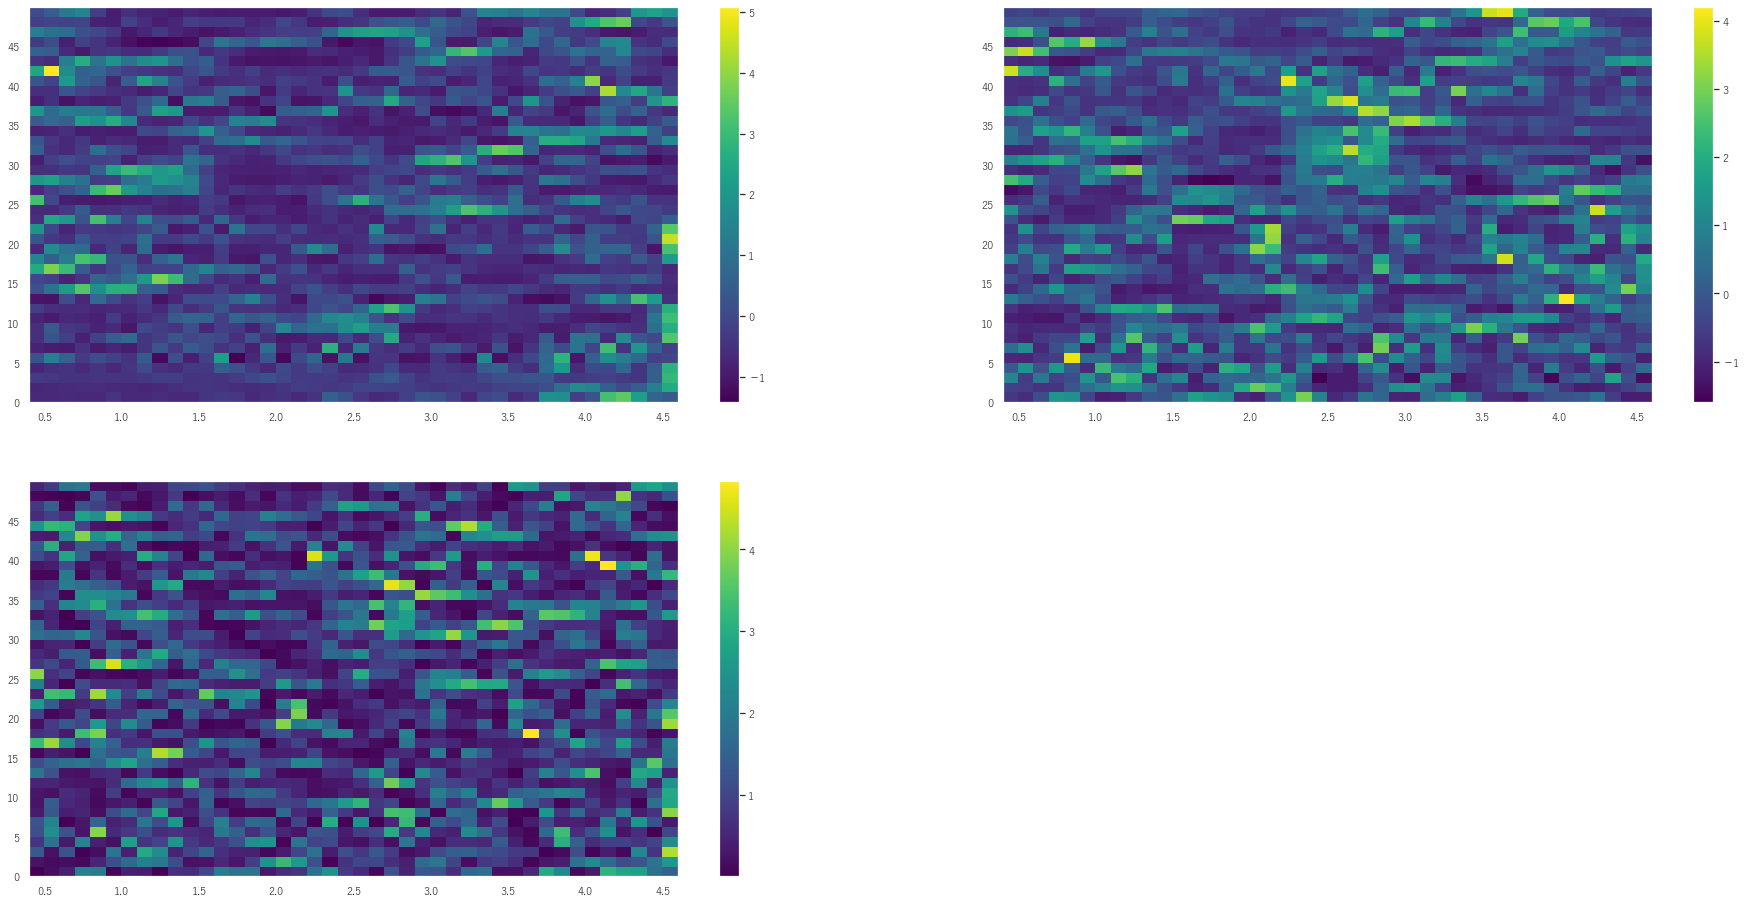

In [16]:
train = train_Hips[train_Label == 7][904]
subway = train_Hips[train_Label == 7][100]

plt.figure(figsize=(32, 16))
plt.rcParams['image.cmap'] = 'viridis'

nfft = 80
noverlap = nfft - 10

plt.subplot(2, 2, 1)
f, t, Sxx1 = signal.spectrogram(train, fs=100, nfft=nfft, nperseg=nfft, noverlap=noverlap)
print(Sxx1.shape)
plt.grid(False)
Sxx1 = (Sxx1 - Sxx1.mean(axis=1, keepdims=True)) / Sxx1.std(axis=1, keepdims=True)
plt.pcolormesh(t, f, Sxx1)
plt.colorbar()
plt.yticks(np.arange(0, 50, 5))

plt.subplot(2, 2, 2)
f, t, Sxx = signal.spectrogram(subway - subway.mean(), fs=100, nfft=nfft, nperseg=nfft, noverlap=noverlap)
print(Sxx.shape)
plt.grid(False)
Sxx = (Sxx - Sxx.mean(axis=1, keepdims=True)) / Sxx.std(axis=1, keepdims=True)
plt.pcolormesh(t, f, Sxx)
plt.colorbar()
plt.yticks(np.arange(0, 50, 5))

plt.subplot(2, 2, 3)
plt.grid(False)
plt.pcolormesh(t, f, np.abs(Sxx1 - Sxx))
plt.colorbar()
plt.yticks(np.arange(0, 50, 5))

In [3]:
def spectram(x):
    nfft = 80
    noverlap = nfft - 10
    x = signal.spectrogram(x - x.mean(), fs=100, nfft=nfft, nperseg=nfft, noverlap=noverlap)[2]
    x = (x - x.mean(axis=1, keepdims=True)) / x.std(axis=1, keepdims=True)
    return x

In [16]:
Bag = load_numpy("Bag")
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

(28685, 500)

In [17]:
%%time
Bag = np.apply_along_axis(spectram, 1, Bag)
Hips = np.apply_along_axis(spectram, 1, Hips)
Torso = np.apply_along_axis(spectram, 1, Torso)
Hand = np.apply_along_axis(spectram, 1, Hand)

Bag.shape

Wall time: 25.8 s


(28685, 41, 43)

In [10]:
%%time

np.save("train_Bag_glo_gyr_norm_spectram_axis1_2", Bag)
np.save("train_Hips_glo_gyr_norm_spectram_axis1_2", Hips)
np.save("train_Torso_glo_gyr_norm_spectram_axis1_2", Torso)
np.save("train_Hand_glo_gyr_norm_spectram_axis1_2", Hand)

Wall time: 1min 25s


In [15]:
def load_numpy(hold_position):
    file_path = "../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_"
    sensor = np.load(file_path + "Glo_Gyr_ver2.npy")
    sensor = np.sqrt(np.square(sensor[:, :, 0]) + np.square(sensor[:, :, 1]) + np.square(sensor[:, :, 2])).reshape([-1, 500])
    return sensor

In [18]:
np.save("validation_Bag_glo_gyr_norm_spectram_axis1_2", Bag)
np.save("validation_Hips_glo_gyr_norm_spectram_axis1_2", Hips)
np.save("validation_Torso_glo_gyr_norm_spectram_axis1_2", Torso)
np.save("validation_Hand_glo_gyr_norm_spectram_axis1_2", Hand)

In [22]:
def load_numpy():
    file_path = "../Data/センサ別npyファイル/test/test_"
    sensor = np.load(file_path + "Glo_Gyr_ver2.npy")
    sensor = np.sqrt(np.square(sensor[:, :, 0]) + np.square(sensor[:, :, 1]) + np.square(sensor[:, :, 2])).reshape([-1, 500])
    return sensor

In [23]:
test = load_numpy()
test = np.apply_along_axis(spectram, 1, test)
test.shape

(57573, 41, 43)

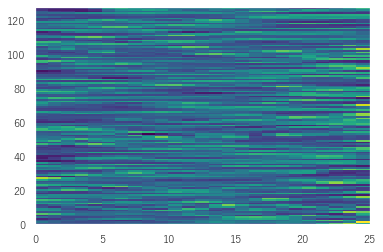

In [18]:
plt.rcParams['image.cmap'] = 'viridis'
plt.pcolormesh(test[7])

In [24]:
np.save("test_glo_gyr_norm_spectram_axis1_2", test)

# FFT5Hzおきに最大値じゃなくて、合計値
## プログラム書き換えて、Glo_LAcc-z、Glo_Gyr_ver2-z、Glo_Mag_ver2-normで作成

In [1]:
import numpy as np
from scipy import stats
import scipy.signal as signal

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
def fft(x):
    frequency_range = [i for i in range(0, 275, 25)] # 0~50Hzを5Hz刻みでやる
    for frequency in frequency_range:
        for i in range(x.shape[0]):
            x[i] = x[i] - np.mean(x[i])
        x_tmp = np.abs(np.fft.fft(x, axis=1))
        max_amplitude = np.sum(x_tmp[:, frequency:frequency+25], axis=1)
        max_index = np.argmax(x_tmp[:, frequency:frequency+25], axis=1)
        max_frequency = (max_index + frequency) * 0.2
        result_tmp = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
        try:
            result = np.concatenate([result, result_tmp], axis=1)
        except:
            result = result_tmp.copy()
    return result

In [3]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_Mag_ver2.npy")
    x = np.sqrt(np.square(x[:, :, 0]) + np.square(x[:, :, 1]) + np.square(x[:, :, 2])).reshape([-1, 500])
    return x

In [26]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Mag.npy")
    x = np.sqrt(np.square(x[:, :, 0]) + np.square(x[:, :, 1]) + np.square(x[:, :, 2])).reshape([-1, 500])
    return x

In [4]:
test = np.load("../Data/センサ別npyファイル/test/test_Mag.npy")
test = np.sqrt(np.square(test[:, :, 0]) + np.square(test[:, :, 1]) + np.square(test[:, :, 2])).reshape([-1, 500])
test = fft(test)
np.save("test_mag_norm_sum_frequency_range5Hz", test)

In [4]:
Bag = load_numpy('Bag')
Hips = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Hand.shape

(195491, 500)

In [5]:
Bag_FFT = fft(Bag)
Hips_FFT = fft(Hips)
Torso_FFT = fft(Torso)
Hand_FFT = fft(Hand)

Hand_FFT.shape

(195491, 22)

In [24]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(Hips[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

(28685, 22)

In [6]:
np.save("train_Bag_glo_mag_norm_sum_frequency_range5Hz", Bag_FFT)
np.save("train_Hips_glo_mag_norm_sum_frequency_range5Hz", Hips_FFT)
np.save("train_Torso_glo_mag_norm_sum_frequency_range5Hz", Torso_FFT)
np.save("train_Hand_glo_mag_norm_sum_frequency_range5Hz", Hand_FFT)

In [29]:
np.save("validation_Bag_mag_norm_sum_frequency_range5Hz", Bag_FFT)
np.save("validation_Hips_mag_norm_sum_frequency_range5Hz", Hips_FFT)
np.save("validation_Torso_mag_norm_sum_frequency_range5Hz", Torso_FFT)
np.save("validation_Hand_mag_norm_sum_frequency_range5Hz", Hand_FFT)

# ラベルの変わり目を検出
# 少しでも学習を最適化！

In [1]:
import numpy as np
from scipy import stats
import scipy.signal as signal

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from tqdm import tqdm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
Label = np.load("../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1])
change_index = []
for i in tqdm(range(len(Label)-1)):
    if Label[i] != Label[i+1]:
        if i == 120844 or i == 120845:
            print("これはNaN")
        change_index.append(i+1)

100%|█████████████████████████████████████████████████████████████████████| 195490/195490 [00:00<00:00, 2086240.03it/s]

これはNaN


In [3]:
change_before_index = []
for i in range(len(change_index)):
    change_before_index.append(change_index[i] - 1)

In [4]:
for i in range(len(change_before_index)):
    change_index.append(change_before_index[i])
len(change_index)

1250

In [21]:
train_Bag = np.load("../Data/センサ別npyファイル/train/train_Hips/train_Hips_Glo_LAcc_ver2.npy")
train_Bag.shape

(195491, 500, 3)

In [22]:
train_Bag = np.delete(train_Bag, change_index, axis=0)
train_Bag.shape

(194241, 500, 3)

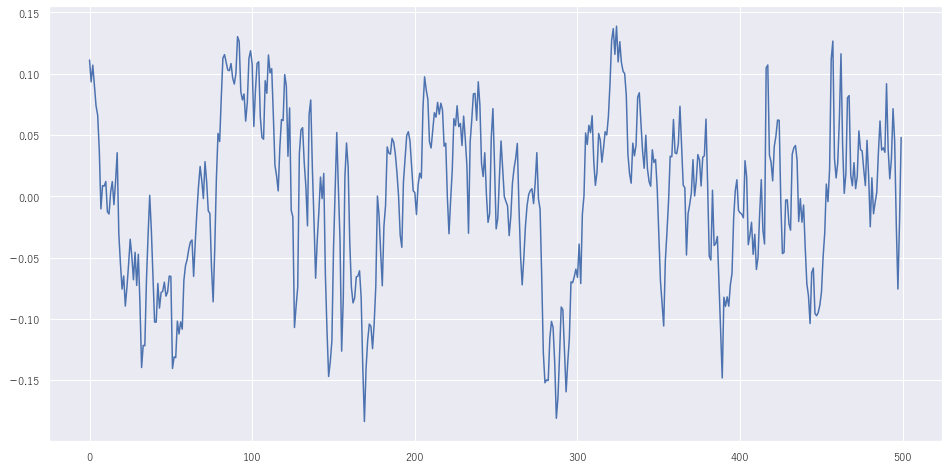

In [23]:
plt.figure(figsize=(16, 8))

plt.plot(train_Bag[1000, :, 0])
plt.show()

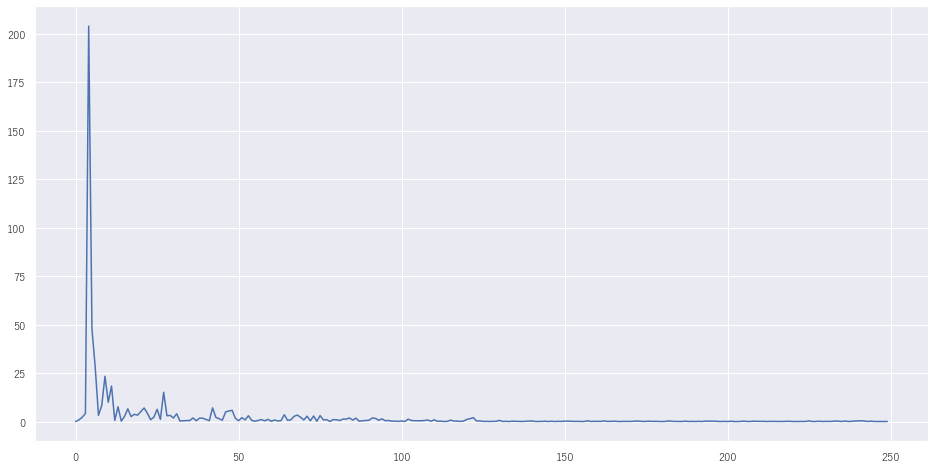

In [24]:
fft = np.square(np.abs(np.fft.fft(train_Bag[:, :, 0] - train_Bag[:, :, 0].mean(axis=1, keepdims=True), axis=1)))
plt.figure(figsize=(16, 8))
plt.plot(fft[1000, :250])

In [25]:
train_Bag = (train_Bag - train_Bag.mean(axis=1, keepdims=True)) / train_Bag.std(axis=1, keepdims=True)
train_Bag.shape

(194241, 500, 3)

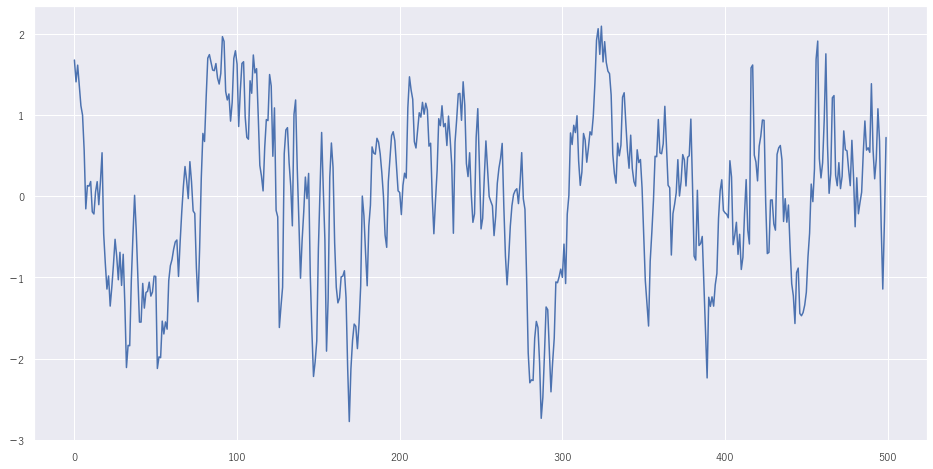

In [26]:
plt.figure(figsize=(16, 8))

plt.plot(train_Bag[1000, :, 0])
plt.show()

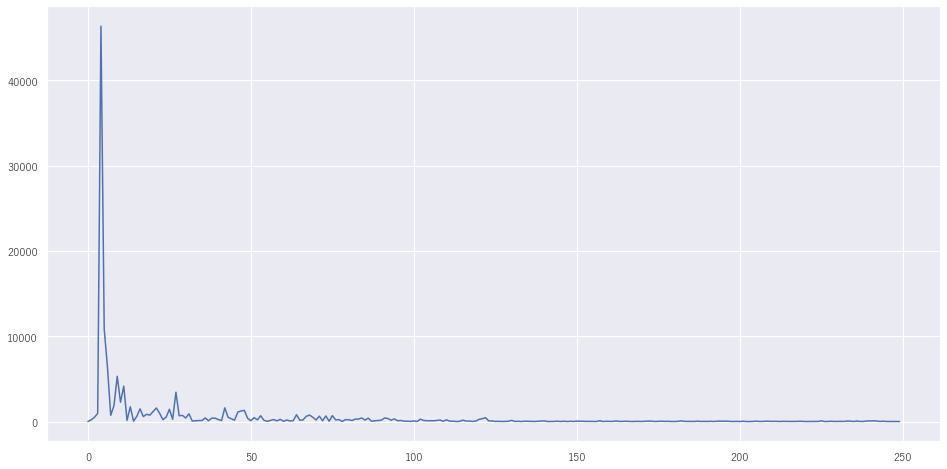

In [27]:
fft = np.square(np.abs(np.fft.fft(train_Bag[:, :, 0]  - train_Bag[:, :, 0].mean(axis=1, keepdims=True), axis=1)))
plt.figure(figsize=(16, 8))
plt.plot(fft[1000, :250])

# なんと、世界座標系変換で0のやつがあった！
## <s>Scipyでの変換を検討</s>

In [1]:
import numpy as np
from scipy import stats
import scipy.signal as signal

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from tqdm import tqdm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]
sensors = ["Acc", "LAcc", "Gra", "Mag", "Gyr"]
versions = ["ver2", "ver3"]

In [5]:
for hold_position in hold_positions:
    for sensor in sensors:
        a = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_" + sensor + ".npy")
        print(hold_position, sensor, np.unique(np.where(np.var(a, axis=1) == 0)[0]).shape)

Bag Acc (0,)
Bag LAcc (0,)
Bag Gra (0,)
Bag Mag (0,)
Bag Gyr (0,)
Hips Acc (0,)
Hips LAcc (0,)
Hips Gra (0,)
Hips Mag (0,)
Hips Gyr (0,)
Torso Acc (0,)
Torso LAcc (4,)
Torso Gra (0,)
Torso Mag (0,)
Torso Gyr (0,)
Hand Acc (0,)
Hand LAcc (7,)
Hand Gra (7,)
Hand Mag (0,)
Hand Gyr (0,)


In [3]:
for hold_position in hold_positions:
    for sensor in sensors:
        a = np.load("../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_" + sensor + ".npy")
        print(hold_position, sensor, np.unique(np.where(np.var(a, axis=1) == 0)[0]).shape)

Bag Acc (0,)
Bag LAcc (1,)
Bag Gra (1,)
Bag Mag (0,)
Bag Gyr (0,)
Hips Acc (1,)
Hips LAcc (0,)
Hips Gra (0,)
Hips Mag (0,)
Hips Gyr (0,)
Torso Acc (0,)
Torso LAcc (0,)
Torso Gra (0,)
Torso Mag (0,)
Torso Gyr (0,)
Hand Acc (3,)
Hand LAcc (8,)
Hand Gra (10,)
Hand Mag (0,)
Hand Gyr (0,)


In [4]:
for hold_position in hold_positions:
    for sensor in sensors:
        for version in versions:
            a = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_" + sensor + "_" + version + ".npy")
            print(hold_position, sensor, version, np.unique(np.where(np.var(a, axis=1) == 0)[0]).shape)

Bag Acc ver2 (0,)
Bag Acc ver3 (0,)
Bag LAcc ver2 (0,)
Bag LAcc ver3 (0,)
Bag Gra ver2 (0,)
Bag Gra ver3 (0,)
Bag Mag ver2 (0,)
Bag Mag ver3 (0,)
Bag Gyr ver2 (0,)
Bag Gyr ver3 (0,)
Hips Acc ver2 (0,)
Hips Acc ver3 (0,)
Hips LAcc ver2 (0,)
Hips LAcc ver3 (0,)
Hips Gra ver2 (0,)
Hips Gra ver3 (0,)
Hips Mag ver2 (0,)
Hips Mag ver3 (0,)
Hips Gyr ver2 (0,)
Hips Gyr ver3 (0,)
Torso Acc ver2 (0,)
Torso Acc ver3 (0,)
Torso LAcc ver2 (0,)
Torso LAcc ver3 (0,)
Torso Gra ver2 (0,)
Torso Gra ver3 (0,)
Torso Mag ver2 (104527,)
Torso Mag ver3 (0,)
Torso Gyr ver2 (0,)
Torso Gyr ver3 (0,)
Hand Acc ver2 (0,)
Hand Acc ver3 (0,)
Hand LAcc ver2 (0,)
Hand LAcc ver3 (0,)
Hand Gra ver2 (0,)
Hand Gra ver3 (0,)
Hand Mag ver2 (55156,)
Hand Mag ver3 (0,)
Hand Gyr ver2 (0,)
Hand Gyr ver3 (0,)


In [4]:
for hold_position in hold_positions:
    for sensor in sensors:
        for version in versions:
            a = np.load("../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Glo_" + sensor + "_" + version + ".npy")
            print(hold_position, sensor, version, np.unique(np.where(np.var(a, axis=1) == 0)[0]).shape)

Bag Acc ver2 (0,)
Bag Acc ver3 (0,)
Bag LAcc ver2 (0,)
Bag LAcc ver3 (0,)
Bag Gra ver2 (0,)
Bag Gra ver3 (0,)
Bag Mag ver2 (0,)
Bag Mag ver3 (0,)
Bag Gyr ver2 (0,)
Bag Gyr ver3 (0,)
Hips Acc ver2 (0,)
Hips Acc ver3 (0,)
Hips LAcc ver2 (0,)
Hips LAcc ver3 (0,)
Hips Gra ver2 (0,)
Hips Gra ver3 (0,)
Hips Mag ver2 (0,)
Hips Mag ver3 (18111,)
Hips Gyr ver2 (0,)
Hips Gyr ver3 (0,)
Torso Acc ver2 (0,)
Torso Acc ver3 (0,)
Torso LAcc ver2 (0,)
Torso LAcc ver3 (0,)
Torso Gra ver2 (0,)
Torso Gra ver3 (0,)
Torso Mag ver2 (0,)
Torso Mag ver3 (25888,)
Torso Gyr ver2 (0,)
Torso Gyr ver3 (0,)
Hand Acc ver2 (0,)
Hand Acc ver3 (0,)
Hand LAcc ver2 (0,)
Hand LAcc ver3 (0,)
Hand Gra ver2 (0,)
Hand Gra ver3 (0,)
Hand Mag ver2 (0,)
Hand Mag ver3 (5528,)
Hand Gyr ver2 (0,)
Hand Gyr ver3 (0,)


array([ 90964,  90965,  90966, ..., 195488, 195489, 195490], dtype=int64)

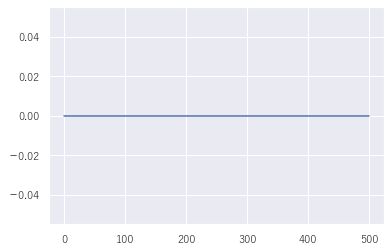

In [11]:
a = np.load("../Data/センサ別npyファイル/train/train_Torso/train_Torso_Glo_Mag_ver2.npy")
plt.plot(a[150250, :, 0])
np.unique(np.where(np.var(a, axis=1) == 0)[0])

In [68]:
a = np.load("../Data/センサ別npyファイル/validation/validation_Hips/validation_Hips_Glo__ver3.npy")
a.shape

(28685, 500, 3)

In [93]:
np.unique(np.where(a == 0)[0]).shape

(0,)

In [94]:
np.unique(np.where(np.var(a, axis=1) == 0)[0]).shape

(0,)

In [98]:
a = np.loadtxt("../Data/Raw/validation/Hips/Glo_Mag_x_ver3.txt")
a.shape

OSError: ../Data/Raw/validation/Hips/Glo_Mag_x_ver3.txt not found.